In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'numpy'

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [3]:
# Reading data
students_data = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")

In [4]:
students_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
students_data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [6]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
students_data.isnull().sum()
# No Null Values

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## EDA

In [8]:
students_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<Figure size 1700x800 with 0 Axes>

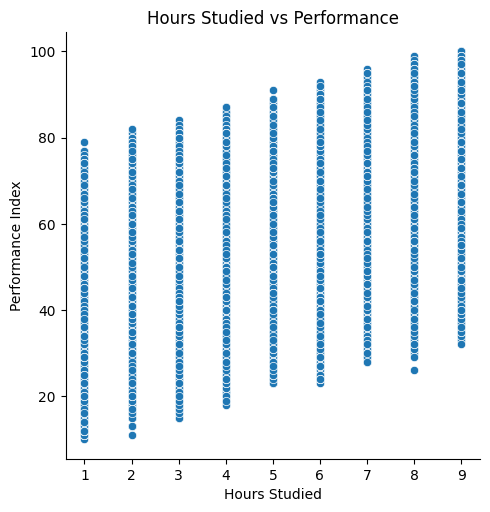

In [9]:
plt.figure(figsize = (17, 8))
sns.relplot(x="Hours Studied", y="Performance Index", data = students_data)
plt.title("Hours Studied vs Performance")
plt.show()

In [10]:
# There is a clear relation between Hours Studied vs Performance

<Figure size 1700x800 with 0 Axes>

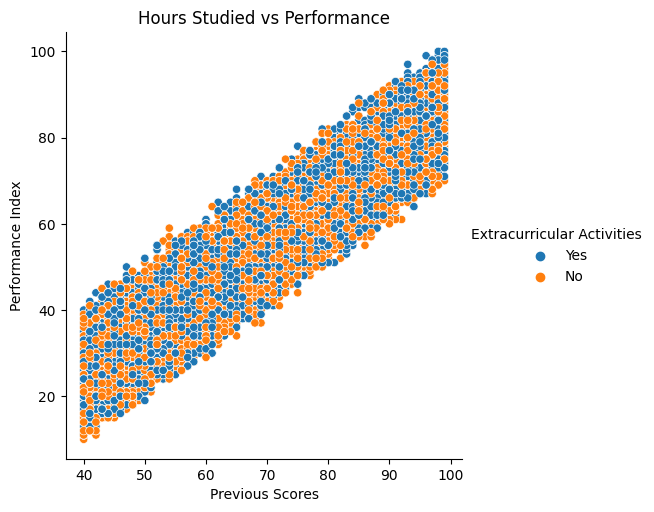

In [11]:
plt.figure(figsize = (17, 8))
sns.relplot(x="Previous Scores", y="Performance Index", hue = "Extracurricular Activities", data = students_data)
plt.title("Hours Studied vs Performance")
plt.show()

In [12]:
# There is a clear relation between Previous Scores vs Performance

<Figure size 1700x800 with 0 Axes>

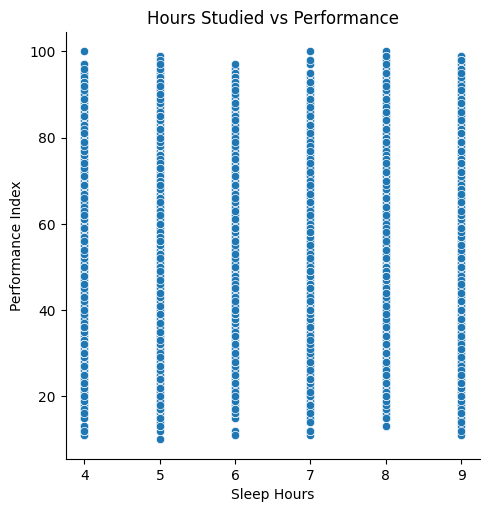

In [13]:
plt.figure(figsize = (17, 8))
sns.relplot(x="Sleep Hours", y="Performance Index", data = students_data)
plt.title("Hours Studied vs Performance")
plt.show()

In [14]:
# There is no proper relation between Sleep Hours and Performance

<Figure size 1700x800 with 0 Axes>

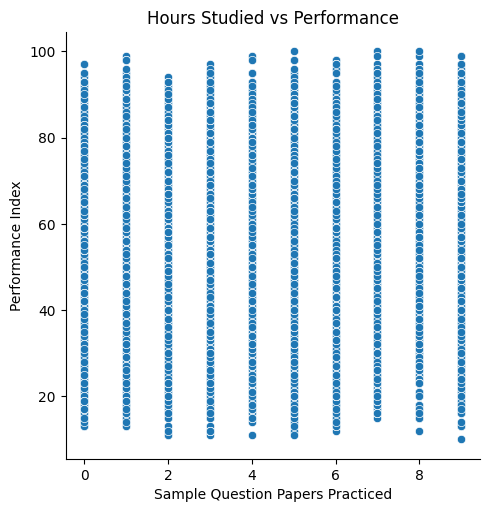

In [15]:
plt.figure(figsize = (17, 8))
sns.relplot(x="Sample Question Papers Practiced", y="Performance Index", data = students_data)
plt.title("Hours Studied vs Performance")
plt.show()

In [16]:
# There is no proper relation between Sample Question Papers Practiced and Performance

<Axes: >

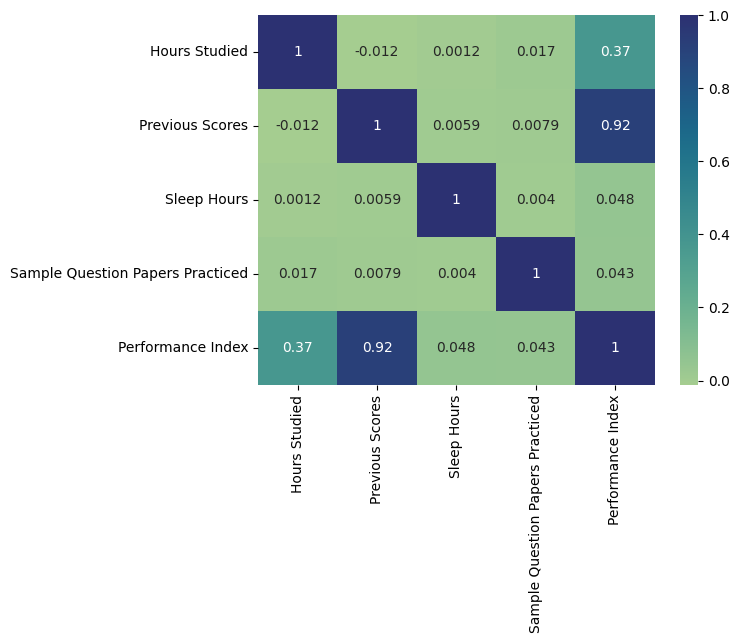

In [17]:
sns.heatmap(students_data.drop("Extracurricular Activities", axis = 1). corr(), annot = True, cmap = "crest")

### Model Creation

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
columns = students_data.columns
columns.drop("Extracurricular Activities")

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [21]:
scalar_data = pd.DataFrame(scaler.fit_transform(students_data.drop("Extracurricular Activities", axis = 1)), columns = students_data.columns.drop("Extracurricular Activities"))

In [22]:
scalar_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,0.866505,0.145333,0.560870


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = scalar_data.drop("Performance Index", axis = 1)
y = scalar_data["Performance Index"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
lr.score(x_test, y_test)

0.9887299686226686

In [30]:
y_pred = lr.predict(x_test)